In [3]:
from pvlib import pvsystem, location, modelchain
import pandas as pd
import matplotlib.pyplot as plt

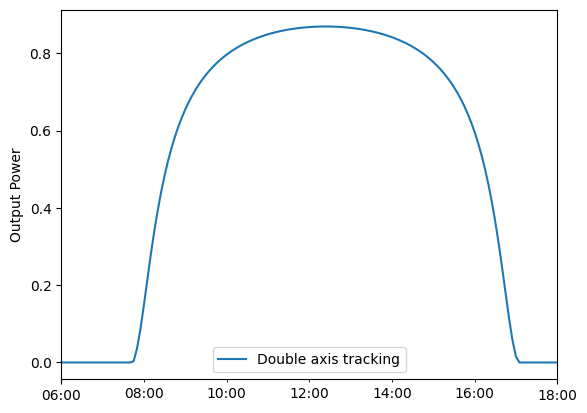

In [8]:
from pvlib import pvsystem, location, modelchain
import pandas as pd
import matplotlib.pyplot as plt

class DualAxisTrackerMount(pvsystem.AbstractMount):
    def get_orientation(self, solar_zenith, solar_azimuth):
        # no rotation limits, no backtracking
        return {'surface_tilt': solar_zenith, 'surface_azimuth': solar_azimuth}


loc = location.Location(40, -80)
array = pvsystem.Array(
    mount=DualAxisTrackerMount(),
    module_parameters=dict(pdc0=1, gamma_pdc=-0.004, b=0.05),
    temperature_model_parameters=dict(a=-3.56, b=-0.075, deltaT=3))
system = pvsystem.PVSystem(arrays=[array], inverter_parameters=dict(pdc0=3))
mc = modelchain.ModelChain(system, loc, spectral_model='no_loss')

times = pd.date_range('2019-01-01 06:00', '2019-01-01 18:00', freq='5min',
                      tz='Etc/GMT+5')
weather = loc.get_clearsky(times)
mc.run_model(weather)

mc.results.ac.plot(label='Double axis tracking')
plt.ylabel('Output Power')
plt.legend()
plt.show()

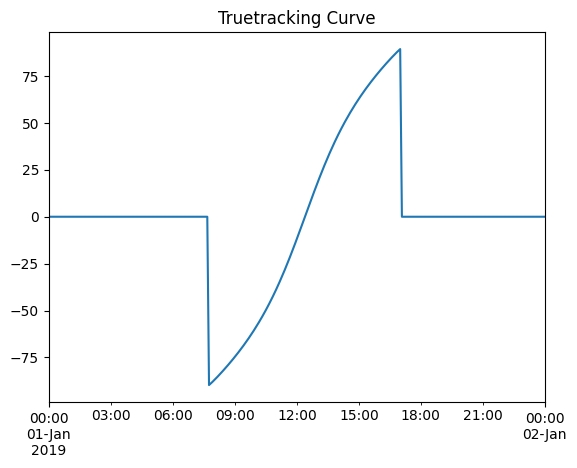

In [1]:
from pvlib import solarposition, tracking
import pandas as pd
import matplotlib.pyplot as plt

tz = 'US/Eastern'
lat, lon = 40, -80

times = pd.date_range('2019-01-01', '2019-01-02', freq='5min',
                      tz=tz)
solpos = solarposition.get_solarposition(times, lat, lon)

truetracking_angles = tracking.singleaxis(
    apparent_zenith=solpos['apparent_zenith'],
    apparent_azimuth=solpos['azimuth'],
    axis_tilt=0,
    axis_azimuth=180,
    max_angle=90,
    backtrack=False,  # for true-tracking
    gcr=0.5)  # irrelevant for true-tracking

truetracking_position = truetracking_angles['tracker_theta'].fillna(0)
truetracking_position.plot(title='Truetracking Curve')

plt.show()

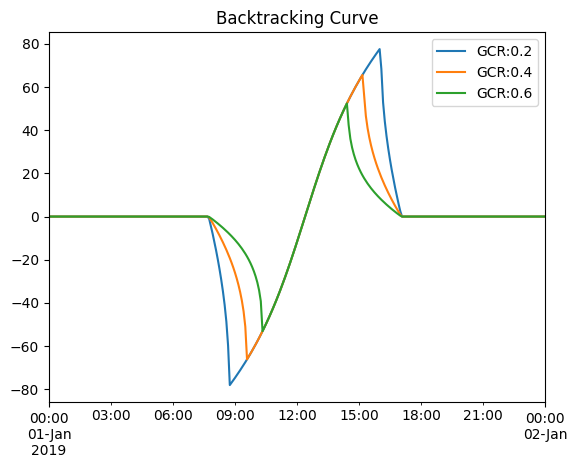

In [2]:
fig, ax = plt.subplots()

for gcr in [0.2, 0.4, 0.6]:
    backtracking_angles = tracking.singleaxis(
        apparent_zenith=solpos['apparent_zenith'],
        apparent_azimuth=solpos['azimuth'],
        axis_tilt=0,
        axis_azimuth=180,
        max_angle=90,
        backtrack=True,
        gcr=gcr)

    backtracking_position = backtracking_angles['tracker_theta'].fillna(0)
    backtracking_position.plot(title='Backtracking Curve',
                               label=f'GCR:{gcr:0.01f}',
                               ax=ax)

plt.legend()
plt.show()